In [91]:
#Import some extention libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
import xlsxwriter
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn import metrics
from pandas_profiling import ProfileReport
import math
import re
from scipy.optimize import curve_fit
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## CHECK/CLEAN THE EXTRACTED DATA SET

In [18]:
USACarsDatasets = pd.read_excel(r"C:\Users\Sales\USACarsDatasets.xlsx")

In [19]:
CJC = USACarsDatasets
CJC

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [20]:
CJC.isnull().any()

Unnamed: 0      False
price           False
brand           False
model           False
year            False
title_status    False
mileage         False
color           False
vin             False
lot             False
state           False
country         False
condition       False
dtype: bool

In [21]:
CJC.shape

(2499, 13)

In [22]:
CJC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


In [23]:
profile = ProfileReport(CJC,title='USA Cars Sales Data',html={'style': {'full_width':True}})

In [24]:
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
corr = CJC.corr()

corr

,Unnamed: 0,price,year,mileage,lot
Unnamed: 0,1.000000,0.098417,0.244921,-0.129258,0.012577
price,0.098417,1.000000,0.418274,-0.400838,0.159369
year,0.244921,0.418274,1.000000,-0.594686,0.164582
mileage,-0.129258,-0.400838,-0.594686,1.000000,-0.130475
lot,0.012577,0.159369,0.164582,-0.130475,1.000000


## PRE-POCESSING THE DATA

In [29]:
CJC.drop(['Unnamed: 0','vin','country'],axis=1,inplace=True)
CJC.head()

,price,brand,model,year,title_status,mileage,color,lot,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,159348797,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,166951262,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,167655728,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,167753855,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,167763266,florida,22 hours left


In [30]:
CJC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         2499 non-null   int64 
 1   brand         2499 non-null   object
 2   model         2499 non-null   object
 3   year          2499 non-null   int64 
 4   title_status  2499 non-null   object
 5   mileage       2499 non-null   int64 
 6   color         2499 non-null   object
 7   lot           2499 non-null   int64 
 8   state         2499 non-null   object
 9   condition     2499 non-null   object
dtypes: int64(4), object(6)
memory usage: 195.4+ KB


## ENCODING THE DATA

In [32]:
CJC = pd.get_dummies(CJC,drop_first=True)
CJC.head()

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,6300,2008,274117,159348797,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552,166951262,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5350,2018,39590,167655728,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146,167753855,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654,167763266,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
CJC_x = CJC.drop('price',axis=1)

## CHECK AND REMOVE OUTLIERS IN PRICE COLUMN (IF ANY)

## Option -1

In [34]:
from scipy.stats import zscore

In [35]:
CJC['Zscore_sp'] = zscore(CJC.price)
CJC[(CJC.Zscore_sp >3.0) | (CJC.Zscore_sp <-3.0)]

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
277,67000,2019,10944,167759490,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.981644
399,61200,2020,7509,167417053,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.502847
414,58500,2019,21527,167765561,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.279958
426,55600,2020,8186,167605747,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.040559
502,84900,2017,25302,167607883,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.459314
645,62000,2016,19403,167780136,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.568888
667,63200,2016,4266,167783470,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.667949
1215,65500,2019,6500,167718954,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.857817
1327,56700,2019,13884,167737612,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.131365
1331,65200,2019,18138,167737619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.833052


{'whiskers': [<matplotlib.lines.Line2D at 0x1a7839fa7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7839fae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7839fa460>],
 'medians': [<matplotlib.lines.Line2D at 0x1a783a17580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a783a178e0>],
 'means': []}

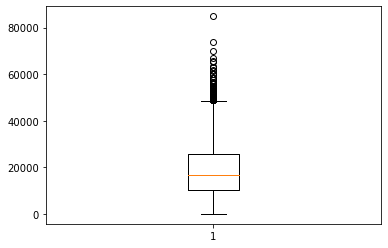

In [36]:
plt.boxplot(CJC['price'])

In [37]:
CJCk_No_Outlier = CJC[(CJC.Zscore_sp <3.0) & (CJC.Zscore_sp >-3.0)]
CJCk_No_Outlier

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
0,6300,2008,274117,159348797,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.029223
1,2899,2011,190552,166951262,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-1.309980
2,5350,2018,39590,167655728,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.107647
3,25000,2014,64146,167753855,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.514487
4,27700,2018,6654,167763266,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.737376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609,167722715,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.905396
2495,9200,2018,34553,167762225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2496,9200,2018,31594,167762226,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2497,9200,2018,32557,167762227,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824


In [38]:
CJCk_No_Outlier.shape

(2474, 296)

In [39]:
CJC.shape[0] - CJCk_No_Outlier.shape[0]

25

{'whiskers': [<matplotlib.lines.Line2D at 0x1a78246ce20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a782480520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a78246cac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a782480be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a782480f40>],
 'means': []}

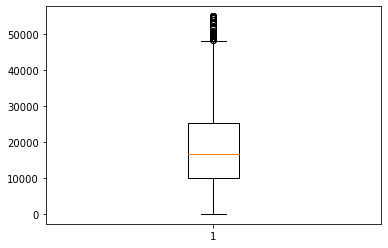

In [40]:
plt.boxplot(CJCk_No_Outlier['price'])

In [41]:
CJCkx_No_Outlier = CJCk_No_Outlier.drop(['price','Zscore_sp'],axis=1)
CJCkx_No_Outlier

,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,2008,274117,159348797,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,190552,166951262,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2018,39590,167655728,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2014,64146,167753855,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,6654,167763266,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2019,23609,167722715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2495,2018,34553,167762225,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,2018,31594,167762226,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,2018,32557,167762227,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Option -2

In [42]:
from scipy.stats import norm

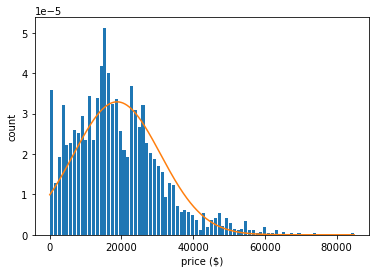

In [43]:
plt.hist(CJC.price, bins=80, rwidth=0.8, density=True)
plt.xlabel('price ($)')
plt.ylabel('count')

rng = np.arange(CJC.price.min(), CJC.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,CJC.price.mean(), CJC.price.std()))

In [44]:
CJC.price.mean()

18767.671468587436

In [45]:
CJC.price.std()

12116.094935650759

In [46]:
upper_limit = CJC.price.mean() + 4*CJC.price.std()
upper_limit

67232.05121119047

In [47]:
lower_limit = CJC.price.mean() - 1.5*CJC.price.std()
lower_limit

593.5290651112991

In [48]:
CJC[(CJC.price>upper_limit) | (CJC.price<lower_limit)]

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
141,0,2008,177948,167756157,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
144,0,2014,123660,167756167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
188,175,2000,231240,167756464,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-1.534850
196,0,2017,76858,167656523,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
206,25,2020,7232,167756877,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1.547233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,25,2010,149189,167650663,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1.547233
545,0,1993,0,167358601,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.549297
1336,70000,2019,9643,167780680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.229299
1340,74000,2019,10536,167780682,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.559504


In [49]:
CJC_No_Outlier = CJC[(CJC.price<upper_limit) & (CJC.price>lower_limit)]
CJC_No_Outlier

,price,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired,Zscore_sp
0,6300,2008,274117,159348797,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.029223
1,2899,2011,190552,166951262,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-1.309980
2,5350,2018,39590,167655728,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.107647
3,25000,2014,64146,167753855,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.514487
4,27700,2018,6654,167763266,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.737376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609,167722715,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.905396
2495,9200,2018,34553,167762225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2496,9200,2018,31594,167762226,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824
2497,9200,2018,32557,167762227,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.789824


In [50]:
CJC_No_Outlier.shape

(2419, 296)

In [51]:
CJC.shape[0] - CJC_No_Outlier.shape[0]

80

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7bac390d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7bac39790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7bac2bd30>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7bac39e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7bac46190>],
 'means': []}

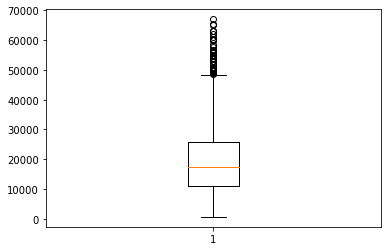

In [55]:
plt.boxplot(CJC_No_Outlier['price'])

## Note: Option 1 is selected (with 25 outliers removed) to complete my model

### Cheking for Multicollinearity

In [56]:
corr = CJCkx_No_Outlier.corr()

corr

,year,mileage,lot,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
year,1.000000,-0.593575,0.164203,-0.063475,-0.060078,-0.014652,-0.033138,-0.115356,-0.047563,0.078708,...,-0.004581,-0.015702,0.056969,-0.002279,-0.009274,-0.015146,-0.021630,-0.089262,-0.000296,0.004782
mileage,-0.593575,1.000000,-0.129391,0.043971,-0.003109,-0.017904,-0.013279,0.078734,0.029070,-0.064543,...,0.008410,0.023566,-0.040637,0.020245,-0.020370,0.019492,0.018077,0.019851,-0.008229,-0.002671
lot,0.164203,-0.129391,1.000000,-0.039665,0.017547,0.024898,0.020501,0.133454,0.013426,0.016483,...,-0.066613,-0.012047,-0.026820,0.025050,-0.145125,-0.000052,-0.131755,-0.088139,0.016376,0.035817
brand_audi,-0.063475,0.043971,-0.039665,1.000000,-0.003247,-0.002925,-0.002564,-0.014807,-0.003445,-0.018484,...,-0.003247,-0.000809,-0.005897,-0.002809,-0.005288,-0.002144,-0.007451,-0.006235,-0.001402,-0.003445
brand_bmw,-0.060078,-0.003109,0.017547,-0.003247,1.000000,-0.005864,-0.005140,-0.029686,-0.006907,-0.037057,...,-0.006509,-0.001622,-0.011822,-0.005633,-0.010603,-0.004298,-0.014938,-0.012501,-0.002811,-0.006907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
condition_7 hours left,-0.015146,0.019492,-0.000052,-0.002144,-0.004298,-0.003872,-0.003393,0.027363,-0.004560,0.015659,...,-0.004298,-0.001071,-0.007805,-0.003719,-0.007000,1.000000,-0.009863,-0.008253,-0.001856,-0.004560
condition_8 days left,-0.021630,0.018077,-0.131755,-0.007451,-0.014938,-0.013457,-0.011795,-0.061158,-0.015851,0.135221,...,-0.014938,-0.003723,-0.027129,-0.012926,-0.024332,-0.009863,1.000000,-0.028687,-0.006451,-0.015851
condition_9 days left,-0.089262,0.019851,-0.088139,-0.006235,-0.012501,0.025688,0.032233,-0.048766,-0.013264,-0.064122,...,-0.012501,-0.003116,-0.022703,-0.010817,-0.020361,-0.008253,-0.028687,1.000000,-0.005399,-0.013264
condition_9 minutes,-0.000296,-0.008229,0.016376,-0.001402,-0.002811,-0.002532,-0.002220,0.058859,-0.002983,-0.016004,...,-0.002811,-0.000701,-0.005106,-0.002433,-0.004579,-0.001856,-0.006451,-0.005399,1.000000,-0.002983


## TRAIN AND TEST MY MODEL

In [67]:
import statsmodels.api as sm

In [68]:
x = sm.add_constant(CJCkx_No_Outlier)
y = CJCk_No_Outlier.iloc[:,0]

In [69]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)

## MODEL CREATION

In [70]:
Model_1 = sm.OLS(train_y, train_x).fit()

In [71]:
Model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Ordinary least squares
=================================================================================================================
Model:                              OLS                             Adj. R-squared:                    0.732     
Dependent Variable:                 price                           AIC:                               40214.8611
Date:                               2021-09-30 13:38                BIC:                               41679.5320
No. Observations:                   1979                            Log-Likelihood:                    -19845.   
Df Model:                           261                             F-statistic:                       21.72     
Df Residuals:                       1717                            Prob (F-statistic):                0.00      
R-squared:                          0.768                           Scale:                             3.4627e+07
-----------------------------------------------------------------------------------------------------------------
                                                  Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------------------------------
const                                         -1741088.6855 393348.4304 -4.4263 0.0000 -2512581.2841 -969596.0869
year                                               362.1694     75.8465  4.7750 0.0000      213.4081     510.9306
mileage                                             -0.0339      0.0037 -9.2448 0.0000       -0.0411      -0.0267
lot                                                  0.0063      0.0022  2.8390 0.0046        0.0019       0.0106
brand_audi                                        5140.0040   6018.0326  0.8541 0.3932    -6663.4437   16943.4517
brand_bmw                                         3186.2607   5100.4630  0.6247 0.5323    -6817.5150   13190.0364
brand_buick                                       4413.4958   5297.4093  0.8331 0.4049    -5976.5598   14803.5515
brand_cadillac                                    6833.6752   4900.8880  1.3944 0.1634    -2778.6647   16446.0152
brand_chevrolet                                   2535.8308   4374.6099  0.5797 0.5622    -6044.2953   11115.9569
brand_chrysler                                   -4003.7969   4982.3404 -0.8036 0.4217   -13775.8933    5768.2995
brand_dodge                                      -1018.6593   4377.2099 -0.2327 0.8160    -9603.8850    7566.5664
brand_ford                                        2748.9086   4317.6622  0.6367 0.5244    -5719.5234   11217.3407
brand_gmc                                          -44.8212   4512.1203 -0.0099 0.9921    -8894.6529    8805.0105
brand_harley-davidson                             9744.9608   4252.4289  2.2916 0.0220     1404.4739   18085.4477
brand_heartland                                 -20166.6676   5059.9175 -3.9856 0.0001   -30090.9195  -10242.4158
brand_honda                                      -2996.4978   4679.0338 -0.6404 0.5220   -12173.7048    6180.7093
brand_hyundai                                    -5662.5068   4764.7936 -1.1884 0.2348   -15007.9185    3682.9049
brand_infiniti                                    6692.1190   4897.2344  1.3665 0.1720    -2913.0550   16297.2929
brand_jaguar                                        -0.0001      0.0024 -0.0562 0.9552       -0.0048       0.0046
brand_jeep                                        -363.6412   4640.1709 -0.0784 0.9375    -9464.6246    8737.3422
brand_kia                                        -6176.8426   5593.2322 -1.1043 0.2696   -17147.1095    4793.4243
brand_land                                        6451.7548   5819.3429  1.1087 0.2677    -4961.9935   17865.5032
brand_lexus                                         -0.0000      0.0006 -0.0562 0.9552       -0.0011       0.0011
br

## Picking only the significant variables

In [72]:
sig_var1 = ['year','mileage','lot']

In [73]:
train_x = train_x[sig_var1]

In [74]:
Model_2 = sm.OLS(train_y, train_x).fit()

In [76]:
Model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.773     
Dependent Variable:     price            AIC:                         42197.7525
Date:                   2021-09-30 13:39 BIC:                         42214.5235
No. Observations:       1979             Log-Likelihood:              -21096.   
Df Model:               3                F-statistic:                 2247.     
Df Residuals:           1976             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.773            Scale:                       1.0647e+08
------------------------------------------------------------------------------------
              Coef.       Std.Err.        t         P>|t|       [0.025       0.975] 
------------------------------------------------------------------------------------
year         326.3927      64.1547       5.0876     0.0000     200.5748     452.2107
mileage       -0.0660       0.0041     -16.1988     0.0000      -0.0740      -0.0580
lot           -0.0038       0.0008      -4.9150     0.0000      -0.0053      -0.0023
--------------------------------------------------------------------------------
Omnibus:                  264.631           Durbin-Watson:              2.053   
Prob(Omnibus):            0.000             Jarque-Bera (JB):           406.407 
Skew:                     0.937             Prob(JB):                   0.000   
Kurtosis:                 4.191             Condition No.:              46381157
================================================================================
* The condition number is large (5e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [77]:
sig_var2 = ['year','mileage']

In [78]:
train_x = train_x[sig_var2]

In [79]:
Model_3 = sm.OLS(train_y, train_x).fit()

In [80]:
Model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.770     
Dependent Variable:     price            AIC:                         42219.7997
Date:                   2021-09-30 13:40 BIC:                         42230.9804
No. Observations:       1979             Log-Likelihood:              -21108.   
Df Model:               2                F-statistic:                 3320.     
Df Residuals:           1977             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.771            Scale:                       1.0772e+08
------------------------------------------------------------------------------------
                 Coef.      Std.Err.        t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
year            11.0734       0.1513      73.2116     0.0000     10.7768     11.3700
mileage         -0.0741       0.0037     -19.7975     0.0000     -0.0815     -0.0668
--------------------------------------------------------------------------------
Omnibus:                   305.816           Durbin-Watson:              2.055  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           528.706
Skew:                      0.994             Prob(JB):                   0.000  
Kurtosis:                  4.569             Condition No.:              53     
================================================================================

"""

# Diagnose/Validate My Model

## Checking if there is Normal Distribution of the Residuals:

<Figure size 576x432 with 0 Axes>

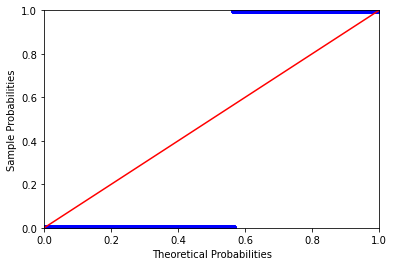

In [81]:
probplot = sm.ProbPlot(Model_3.resid)
plt.figure(figsize = (8,6))
probplot.ppplot(line = '45')
plt.show()

#### From above plot the residuals don't have a Normal Distribution since the RED & BLUE lines are far apart

## Test for Homoscedasticity

In [82]:
def get_standard_values(vals):
    return (vals - vals.mean()) / vals.std()

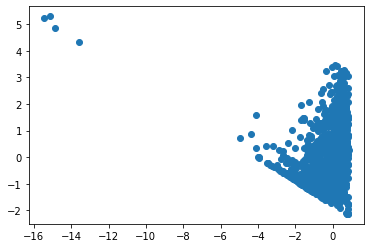

In [83]:
plt.scatter(get_standard_values(Model_3.fittedvalues), get_standard_values(Model_3.resid))

#### There is reverse relationship trend and plot is more concentrated to the bottom right of plot area

# MAKE PREDICTIONS

In [84]:
pred = Model_3.predict(test_x[sig_var2])

In [85]:
pred

1489    21656.552254
1014    20785.335242
319     11197.623227
621     21229.933029
1456    18040.561150
            ...     
1809    14356.710381
2039    19297.365676
2053    20685.996338
748     18172.694569
2092    19885.326923
Length: 495, dtype: float64

In [86]:
## Measure the RMSE value
np.sqrt(metrics.mean_squared_error(pred, test_y))

10287.583581150147

In [87]:
## Measure R2 value
np.round(metrics.r2_score(pred, test_y), 2)

-6.84

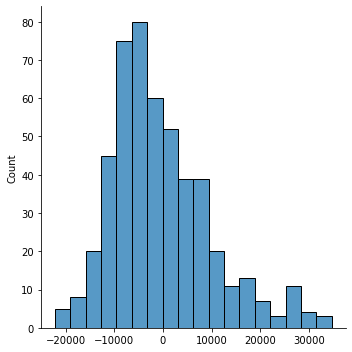

In [88]:
## Distribution plot: Pred vs Actual
sns.displot(test_y - pred)

C:\Users\12146\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

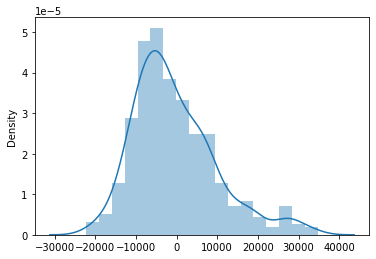

In [89]:
## Distribution plot: Pred vs Actual
sns.distplot(test_y - pred)

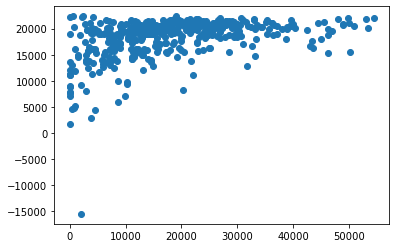

In [90]:
plt.scatter(test_y, pred)

In [92]:
pd.DataFrame({'coef': Model_1.params, 'p-value': round(Model_1.pvalues, 3)})

,coef,p-value
const,-1.741089e+06,0.000
year,3.621694e+02,0.000
mileage,-3.387812e-02,0.000
lot,6.256771e-03,0.005
brand_audi,5.140004e+03,0.393
...,...,...
condition_7 hours left,-4.697893e+03,0.102
condition_8 days left,2.525979e+02,0.833
condition_9 days left,2.774706e+03,0.073
condition_9 minutes,-6.389141e+03,0.139


In [93]:
for i in range(train_x.shape[1]):
    print(variance_inflation_factor(exog=train_x.values, exog_idx=i))
print('All done')

1.7095005624016821
1.7095005624016828
All done
